In [3]:
# %% [markdown]
# # Data Preprocessing
# 
# This notebook handles cleaning and preparing the raw financial data for analysis.

# %% [markdown]
# ## 1. Setup and Configuration

# %%
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Create directories
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../reports/figures', exist_ok=True)

# Style settings - UPDATED to work with modern matplotlib
plt.style.use('seaborn-v0_8')  # Use the updated seaborn style
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (12, 6)

# %% [markdown]
# ## 2. Load Raw Data

# %%
tickers = ['TSLA', 'BND', 'SPY']
raw_data_path = Path('../data/raw')

# Load all raw data files
data_dict = {}
for ticker in tickers:
    file_path = raw_data_path / f'{ticker}_historical.csv'
    try:
        df = pd.read_csv(file_path, parse_dates=['Date'])
        data_dict[ticker] = df
        print(f"✅ Loaded {ticker} with shape {df.shape}")
    except FileNotFoundError:
        print(f"❌ File not found: {file_path}")
        print("Please ensure you've run the data collection notebook first")
    except Exception as e:
        print(f"❌ Error loading {ticker}: {str(e)}")

# Verify all tickers loaded
if not all(ticker in data_dict for ticker in tickers):
    raise ValueError("Some tickers failed to load. Please check the raw data files.")

# %% [markdown]

✅ Loaded TSLA with shape (2535, 8)
✅ Loaded BND with shape (2535, 8)
✅ Loaded SPY with shape (2535, 8)


In [4]:
# ## 3. Data Cleaning Function
def clean_data(df, ticker):
    """
    Clean and preprocess financial data for a single ticker.
    
    Args:
        df (DataFrame): Raw data frame
        ticker (str): Stock ticker symbol
        
    Returns:
        DataFrame: Cleaned data
    """
    # Make copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    print(f"\n🔍 Processing {ticker} data")
    
    # 1. Handle missing values
    print("\nMissing values before cleaning:")
    print(df.isnull().sum())
    
    # Forward fill then backfill if needed
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    
    # 2. Ensure numeric data types
    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    
    # 3. Calculate derived metrics
    df['Daily_Return'] = df['Adj Close'].pct_change()
    df['Log_Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    
    # 4. Calculate volatility metrics
    for window in [5, 21, 63]:  # 1 week, 1 month, 3 months
        df[f'Volatility_{window}d'] = df['Daily_Return'].rolling(window).std() * np.sqrt(window)
    
    # 5. Add moving averages
    for window in [20, 50, 200]:  # Common technical analysis periods
        df[f'MA_{window}d'] = df['Adj Close'].rolling(window).mean()
    
    # 6. Add time-based features
    df['Weekday'] = df['Date'].dt.day_name()
    df['Month'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    
    print("\n✅ Cleaning complete")
    print("Missing values after cleaning:")
    print(df.isnull().sum().sum(), "total missing values")
    
    return df


🧹 Processing TSLA

🔍 Processing TSLA data

Missing values before cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

✅ Cleaning complete
Missing values after cleaning:
358 total missing values
💾 Saved cleaned data to ../data/processed/TSLA_cleaned.csv

🧹 Processing BND

🔍 Processing BND data

Missing values before cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

✅ Cleaning complete
Missing values after cleaning:
358 total missing values
💾 Saved cleaned data to ../data/processed/BND_cleaned.csv

🧹 Processing SPY

🔍 Processing SPY data

Missing values before cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

✅ Cleaning complete
Missing values after cleaning:
358 total missing values
💾 Saved cleaned data to ../da

C:\Users\fre\AppData\Local\Temp\ipykernel_5848\3137670473.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\fre\AppData\Local\Temp\ipykernel_5848\3137670473.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\fre\AppData\Local\Temp\ipykernel_5848\3137670473.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\fre\AppData\Local\Temp\ipykernel_5848\3137670473.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\fre\AppData\Local\T

         Open     High      Low    Close  Adj Close         Volume  \
min    9.4880  10.3313   9.4033   9.5780     9.5780  10620000.0000   
max  475.9000 488.5400 457.5100 479.8600   479.8600 914082000.0000   
mean 132.0006 134.9604 128.8378 131.9630   131.9630 114178885.2071   
std  121.0342 123.7837 117.9966 120.9149   120.9149  73321463.7534   

      Daily_Return  Log_Return  Volatility_5d  Volatility_21d  Volatility_63d  \
min        -0.2106     -0.2365         0.0076          0.0485          0.1252   
max         0.2269      0.2045         0.3307          0.4480          0.6345   
mean        0.0018      0.0011         0.0712          0.1579          0.2814   
std         0.0373      0.0372         0.0426          0.0642          0.0930   

       MA_20d   MA_50d  MA_200d      Year  
min   11.2760  12.6838  14.1614 2015.0000  
max  425.5160 402.0264 320.8187 2025.0000  
mean 131.6847 131.2408 129.0317 2020.0284  
std  119.9130 118.2332 111.0032    2.9370  

❗ Extreme Return Days 

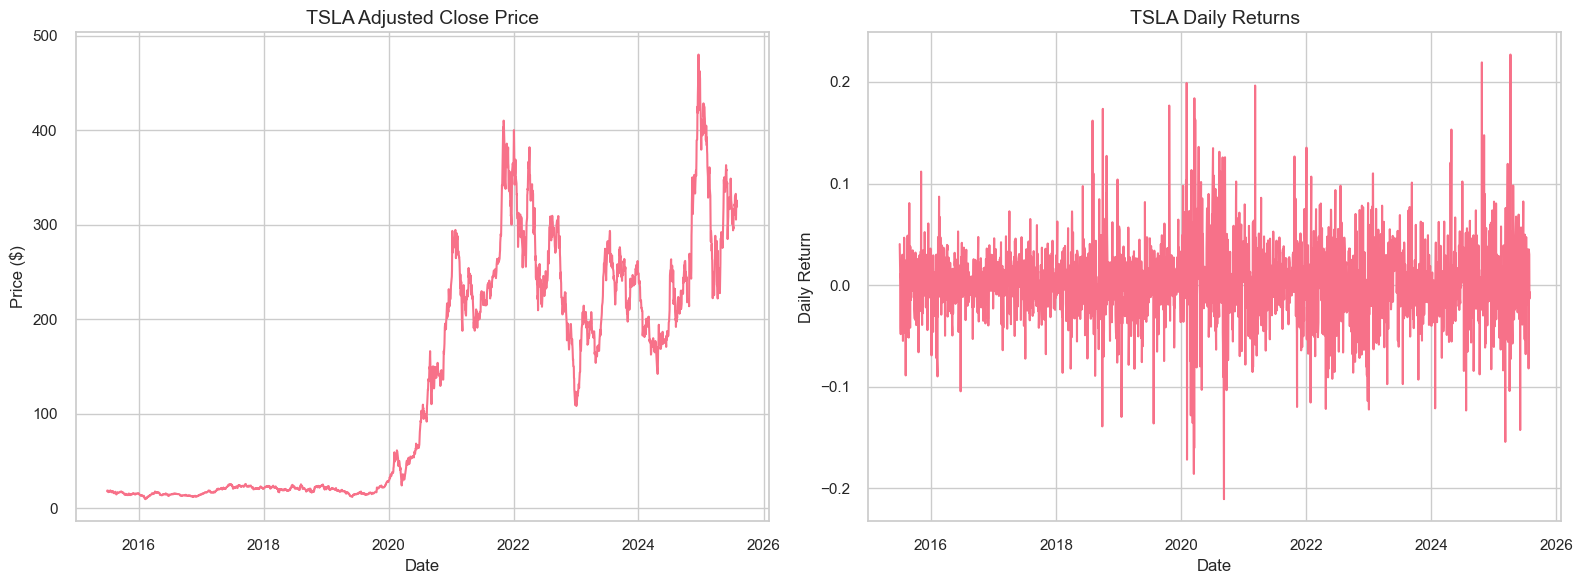


📊 Data Quality Report for BND
📅 Date Range: 2015-07-01 to 2025-07-30
📈 Rows: 2535

🔎 Missing Values:
Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Ticker              0
Daily_Return        1
Log_Return          1
Volatility_5d       5
Volatility_21d     21
Volatility_63d     63
MA_20d             19
MA_50d             49
MA_200d           199
Weekday             0
Month               0
Year                0
dtype: int64

📊 Numeric Value Ranges:
        Open    High     Low   Close  Adj Close        Volume  Daily_Return  \
min  68.0800 68.3800 67.9900 68.0400    60.7791        0.0000       -0.0544   
max  89.5500 89.5900 89.4400 89.4800    77.3182 33963000.0000        0.0422   
mean 79.6476 79.7616 79.5257 79.6450    68.4692  4434375.8185        0.0001   
std   5.3729  5.3535  5.3861  5.3702     4.5546  2899511.0283        0.0035   

      Log_Return  Volatility_5d  Volatility_21

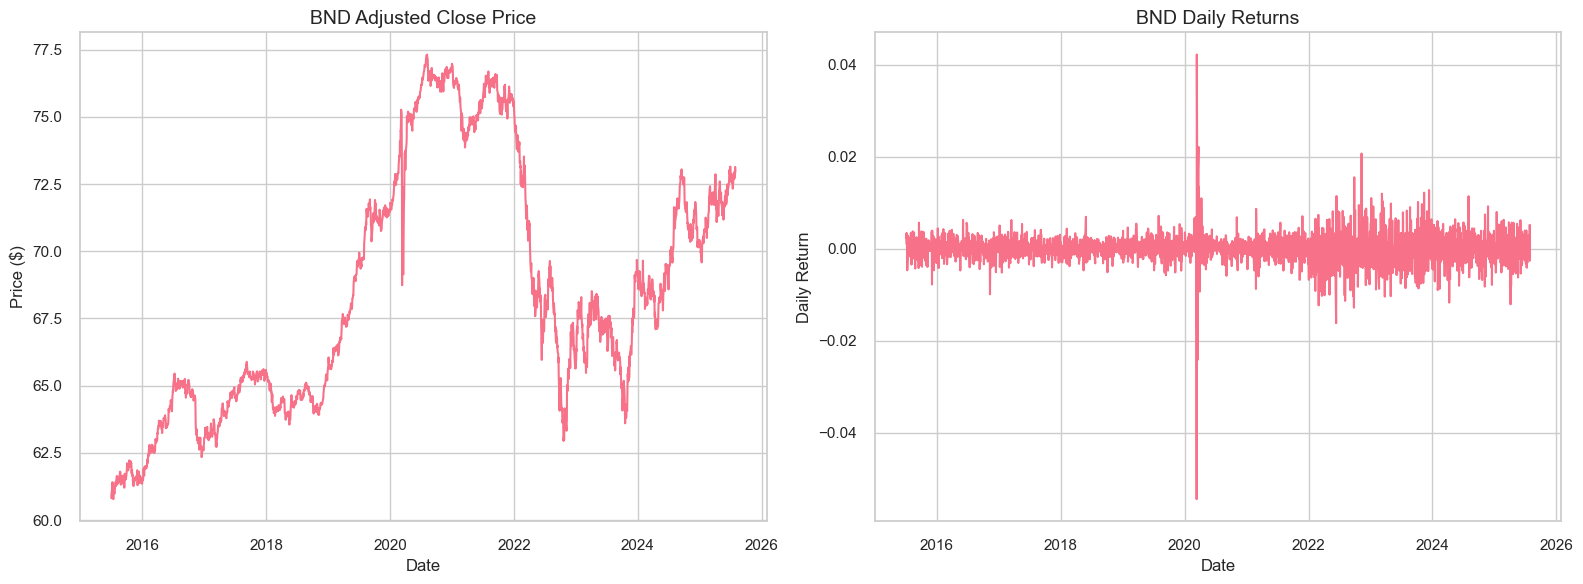


📊 Data Quality Report for SPY
📅 Date Range: 2015-07-01 to 2025-07-30
📈 Rows: 2535

🔎 Missing Values:
Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Ticker              0
Daily_Return        1
Log_Return          1
Volatility_5d       5
Volatility_21d     21
Volatility_63d     63
MA_20d             19
MA_50d             49
MA_200d           199
Weekday             0
Month               0
Year                0
dtype: int64

📊 Numeric Value Ranges:
         Open     High      Low    Close  Adj Close         Volume  \
min  182.3400 184.1000 181.0200 182.8600   155.8698  20270000.0000   
max  638.3500 638.6700 635.5400 637.1000   637.1000 507244300.0000   
mean 355.3551 357.3226 353.2220 355.4265   334.1937  85035205.2465   
std  118.2054 118.8145 117.5276 118.2372   126.4277  44287961.9430   

      Daily_Return  Log_Return  Volatility_5d  Volatility_21d  Volatility_63d  \
min       

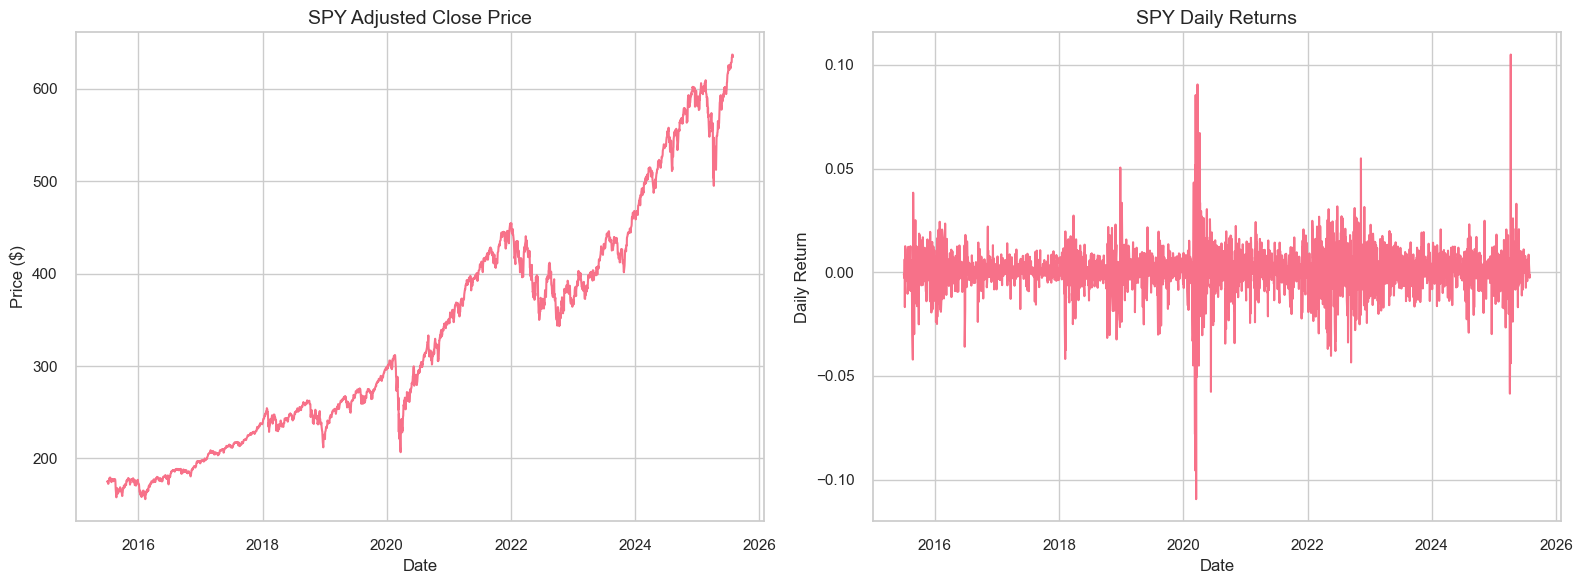


💾 Saved combined dataset to ../data/processed/combined_cleaned.csv with shape: (7605, 19)


In [5]:
# ## 4. Clean All Datasets

# %%
cleaned_data = {}
for ticker, df in data_dict.items():
    print(f"\n{'='*50}")
    print(f"🧹 Processing {ticker}")
    cleaned_df = clean_data(df, ticker)
    cleaned_data[ticker] = cleaned_df
    
    # Save cleaned data
    save_path = f'../data/processed/{ticker}_cleaned.csv'
    cleaned_df.to_csv(save_path, index=False)
    print(f"💾 Saved cleaned data to {save_path}")

# %% [markdown]
# ## 5. Data Quality Checks

# %%
def data_quality_report(df, ticker):
    """Generate a data quality report for a cleaned dataset"""
    print(f"\n{'='*50}")
    print(f"📊 Data Quality Report for {ticker}")
    print(f"📅 Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
    print(f"📈 Rows: {len(df)}")
    
    # Check for missing values
    print("\n🔎 Missing Values:")
    print(df.isnull().sum())
    
    # Check numeric ranges
    print("\n📊 Numeric Value Ranges:")
    numeric_cols = df.select_dtypes(include=np.number).columns
    print(df[numeric_cols].describe().loc[['min', 'max', 'mean', 'std']])
    
    # Check for outliers in returns
    q1 = df['Daily_Return'].quantile(0.01)
    q99 = df['Daily_Return'].quantile(0.99)
    outliers = df[(df['Daily_Return'] < q1) | (df['Daily_Return'] > q99)]
    print(f"\n❗ Extreme Return Days (outside 1-99%): {len(outliers)}")
    
    # Plot price and returns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Price plot
    ax1.plot(df['Date'], df['Adj Close'])
    ax1.set_title(f'{ticker} Adjusted Close Price', fontsize=14)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price ($)')
    
    # Returns plot
    ax2.plot(df['Date'], df['Daily_Return'])
    ax2.set_title(f'{ticker} Daily Returns', fontsize=14)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Daily Return')
    
    plt.tight_layout()
    plt.savefig(f'../reports/figures/{ticker}_price_returns.png', dpi=300, bbox_inches='tight')
    plt.show()

# Generate reports for all tickers
for ticker, df in cleaned_data.items():
    data_quality_report(df, ticker)

# %% [markdown]
# ## 6. Combined Dataset Creation

# %%
# Combine all tickers into single dataframe
combined_df = pd.concat(cleaned_data.values(), ignore_index=True)

# Save combined dataset
combined_path = '../data/processed/combined_cleaned.csv'
combined_df.to_csv(combined_path, index=False)
print(f"\n💾 Saved combined dataset to {combined_path} with shape: {combined_df.shape}")


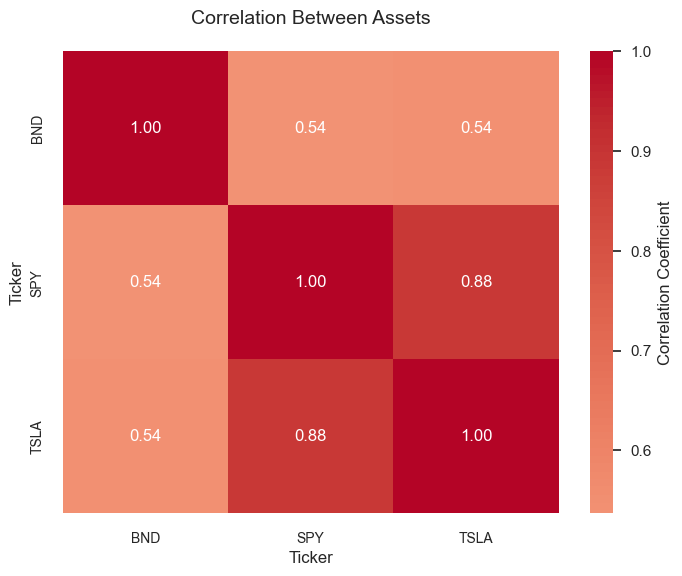


💾 Saved metadata to ../data/processed/metadata.json

✅ All preprocessing complete!


In [6]:
# ## 7. Correlation Analysis

# %%
# Pivot to get adjusted close prices by ticker
pivot_df = combined_df.pivot(index='Date', columns='Ticker', values='Adj Close')

# Calculate correlations
corr_matrix = pivot_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            annot_kws={"size": 12}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Between Assets', fontsize=14, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('../reports/figures/asset_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 8. Save Metadata

# %%
# Create metadata about the processed data
metadata = {
    'processing_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'tickers_processed': tickers,
    'date_range': {
        'start': combined_df['Date'].min().strftime('%Y-%m-%d'),
        'end': combined_df['Date'].max().strftime('%Y-%m-%d')
    },
    'rows_per_ticker': {ticker: len(df) for ticker, df in cleaned_data.items()},
    'columns': list(combined_df.columns),
    'derived_features': [
        'Daily_Return',
        'Log_Return',
        'Volatility_5d',
        'Volatility_21d',
        'Volatility_63d',
        'MA_20d',
        'MA_50d',
        'MA_200d',
        'Weekday',
        'Month',
        'Year'
    ]
}

# Save metadata
import json
metadata_path = '../data/processed/metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"\n💾 Saved metadata to {metadata_path}")
print("\n✅ All preprocessing complete!")